In [1]:
import numpy as np
from shannon.continuous import mi
import timeit
import matplotlib.pyplot as plt
from deepretina.io import despine

%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GT 750M (CNMeM is disabled)
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
x1 = np.random.randn(1000,)
x2 = 0.02*x1 + np.random.randn(1000,)

In [3]:
%timeit mi(x1, x2, method='ann')

The slowest run took 117.04 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 8.58 ms per loop


In [4]:
%timeit mi(x1, x2, method='nearest-neighbors')

10 loops, best of 3: 40 ms per loop


In [5]:
mi(x1, x2, method='ann')

-0.084516389989822471

In [6]:
mi(x1, x2, method='nearest-neighbors')

-0.084516389989822471

In [39]:
lengths = np.logspace(1,3.5,25)

In [40]:
from timeit import timeit

naive_durations = []
sklearn_durations = []
repeats = 10
for l in lengths:
    naive_timers = []
    skl_timers = []
    setup_script = 'from shannon.continuous import mi; import numpy as np; x1 = np.random.randn(%i,); x2 = 0.5*x1 + np.random.randn(%i,)' %(l,l)
    t_naive = timeit("mi(x1, x2, method='nearest-neighbors')", number=repeats, setup=setup_script)
    t_skl = timeit("mi(x1, x2, method='ann')", number=repeats, setup=setup_script)
        
    naive_durations.append(t_naive)
    sklearn_durations.append(t_skl)

In [28]:
# naive_durations = []
# sklearn_durations = []
# repeats = 10
# for l in lengths:
#     naive_timers = []
#     skl_timers = []
#     for r in range(repeats):
#         start_naive = timeit.timeit()
#         tmp = mi(x1, x2, method='nearest-neighbors')
#         end_naive = timeit.timeit()
        
#         start_skl = timeit.timeit()
#         tmp = mi(x1, x2, method='ann')
#         end_skl = timeit.timeit()
        
#         naive_timers.append(end_naive-start_naive)
#         skl_timers.append(end_skl-start_skl)
        
#     naive_durations.append(np.mean(naive_timers))
#     sklearn_durations.append(np.mean(skl_timers))

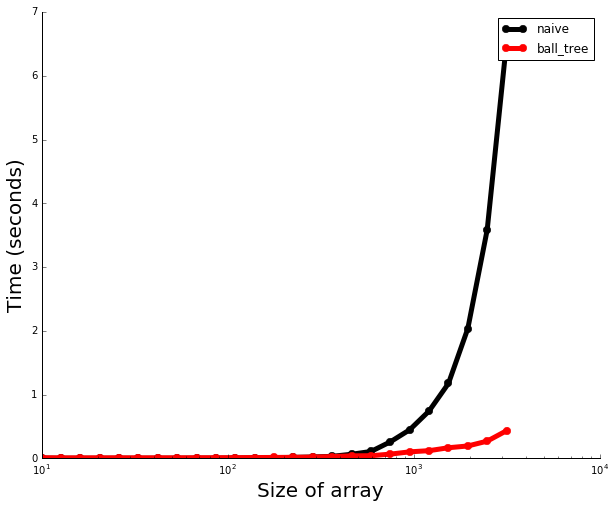

In [41]:
plt.plot(lengths, naive_durations, 'k.-', linewidth=5, markersize=15, label='naive')
plt.plot(lengths, sklearn_durations, 'r.-', linewidth=5, markersize=15, label='ball_tree')
plt.ylabel('Time (seconds)', fontsize=20)
plt.xlabel('Size of array', fontsize=20)
plt.xscale('log')
plt.legend()
despine(plt.gca())

In [25]:
? plt.legend

# compare different algorithms of nearestNeighbors

In [7]:
lengths = np.logspace(1,3.5,25).astype('int')

In [8]:
lengths[0]

10

In [15]:
from timeit import timeit

ball_tree_durations = []
brute_force_durations = []
kd_tree_durations = []
auto_durations = []
repeats = 10
for l in lengths:
    print(l)
    naive_timers = []
    skl_timers = []
    setup_script = 'from shannon.continuous import entropy; import numpy as np; x1 = np.random.randn(%i,1)' %(l)
    t_ball = timeit("entropy(x1, method='ann', algo='ball_tree')", number=repeats, setup=setup_script)
    t_kd_tree = timeit("entropy(x1, method='ann', algo='kd_tree')", number=repeats, setup=setup_script)
    t_auto = timeit("entropy(x1, method='ann', algo='auto')", number=repeats, setup=setup_script)
    t_brute = timeit("entropy(x1, method='ann', algo='brute')", number=repeats, setup=setup_script)
        

    ball_tree_durations.append(t_ball)
    brute_force_durations.append(t_brute)
    kd_tree_durations.append(t_kd_tree)
    auto_durations.append(t_auto)

10
12
16
20
26
33
42
53
68
86
110
139
177
226
287
365
464
589
749
953
1211
1539
1957
2487
3162


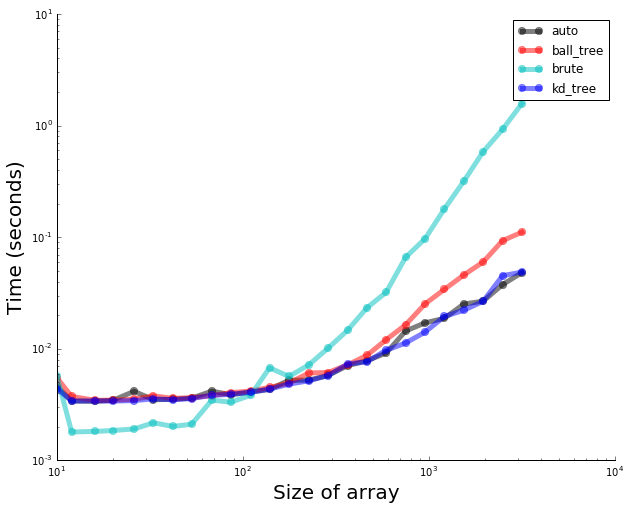

In [19]:
plt.plot(lengths, auto_durations, 'k.-', linewidth=5, markersize=15, label='auto', alpha=0.5)
plt.plot(lengths, ball_tree_durations, 'r.-', linewidth=5, markersize=15, label='ball_tree', alpha=0.5)
plt.plot(lengths, brute_force_durations, 'c.-', linewidth=5, markersize=15, label='brute', alpha=0.5)
plt.plot(lengths, kd_tree_durations, 'b.-', linewidth=5, markersize=15, label='kd_tree', alpha=0.5)
plt.ylabel('Time (seconds)', fontsize=20)
plt.xlabel('Size of array', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend()
despine(plt.gca())